<pre>
                                  __  __ _____  _      ______ _____ _______
                                 |  \/  |  __ \| |    |  ____|_   _|__   __|
                                 | \  / | |  | | |    | |__    | |    | |
                                 | |\/| | |  | | |    |  __|   | |    | |
                                 | |  | | |__| | |____| |     _| |_   | |
                                 |_|  |_|_____/|______|_|    |_____|  |_|

                               music encoding using minimum description length

</pre>
## <center> Encode music dataset</center>      

In [1]:
import music21 as m21
import mdlfit as mf

### music21 settings

Set the location of the `musecore` application to render scores as png image files.

In [2]:
us = m21.environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/musescore'

## 1. Encode a dataset from music xml files

Load and encode a symbolic music dataset from the files in a given directory. 

In this case, the dataset is the **tango songbook** by *Hugo Satorre*, which is provided with the `mdlfit` package. The files of the dataset are music xml files.

In [3]:
# complete path to the dataset folder containing the music files
dataset_string = '../data/tango_songbook/'

# signature
signature = '4/4'

# subdivisions of each beat
beat_subdivisions = 2

# file extension of the dataset's files
file_ext = 'xml'

# encode the dataset
dataset = mf.dataio.encode_dataset(dataset_string,
                                   signature=signature,
                                   beat_subdivisions=beat_subdivisions,
                                   file_ext=file_ext)

ind_file: 0, ../data/tango_songbook/Rubi cancionero.xml


/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/dataio.py:445: RuntimeWarning: Onset position out of grid.
  warnings.warn("Onset position out of grid.", RuntimeWarning)
/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/dataio.py:385: RuntimeWarning: Piece with wrong TimeSignature.
  warnings.warn("Piece with wrong TimeSignature.", RuntimeWarning)


ind_file: 1, ../data/tango_songbook/El viejo vals cancionero.xml
ind_file: 2, ../data/tango_songbook/Fueron tres años cancionero.xml
ind_file: 3, ../data/tango_songbook/Madame Ivonne cancionero.xml
ind_file: 4, ../data/tango_songbook/Rebeldia cancionero.xml
ind_file: 5, ../data/tango_songbook/Trenzas cancionero.xml
ind_file: 6, ../data/tango_songbook/A homero cancionero.xml
ind_file: 7, ../data/tango_songbook/Fangal cancionero.xml
ind_file: 8, ../data/tango_songbook/Toda mi vida cancionero.xml
ind_file: 9, ../data/tango_songbook/Flor de lino cancionero.xml
ind_file: 10, ../data/tango_songbook/Tormento cancionero.xml
ind_file: 11, ../data/tango_songbook/Grisel cancionero.xml
ind_file: 12, ../data/tango_songbook/Tal vez sera su voz cancionero.xml
ind_file: 13, ../data/tango_songbook/Rosa de otoño cancionero.xml
ind_file: 14, ../data/tango_songbook/Pasional cancionero.xml
ind_file: 15, ../data/tango_songbook/Viejas alegrias cancionero.xml
ind_file: 16, ../data/tango_songbook/Mi buenos air

/home/rocamora/investigacion/software/mdlfit/mdlfit-master/examples/mdlfit/dataio.py:383: RuntimeWarning: Piece with several Time Signatures.
  warnings.warn("Piece with several Time Signatures.", RuntimeWarning)


ind_file: 114, ../data/tango_songbook/Volvió una noche cancionero.xml
ind_file: 115, ../data/tango_songbook/Tormenta cancionero.xml
ind_file: 116, ../data/tango_songbook/Mano a mano cancionero.xml
ind_file: 117, ../data/tango_songbook/Cuesta Abajo cancionero.xml
ind_file: 118, ../data/tango_songbook/Duerme cancionero.xml
ind_file: 119, ../data/tango_songbook/Sueño de juventud cancionero.xml
ind_file: 120, ../data/tango_songbook/Mi ciudad y mi gente cancionero.xml
ind_file: 121, ../data/tango_songbook/El bulin de la calle ayacucho cancionero.xml
ind_file: 122, ../data/tango_songbook/Nada mas cancionero.xml
ind_file: 123, ../data/tango_songbook/Recuerdo malevo cancionero.xml
ind_file: 124, ../data/tango_songbook/Naranjo en flor cancionero.xml
ind_file: 125, ../data/tango_songbook/Arrabal amargo cancionero.xml
ind_file: 126, ../data/tango_songbook/Garras cancionero.xml
ind_file: 127, ../data/tango_songbook/Mas solo que nunca cancionero.xml
ind_file: 128, ../data/tango_songbook/Sin palabra

## 2. Show the results of the encoding

### Show some information about the encoded dataset.

In [4]:
print('-'*80)
print('Corpus name (from directory name): ', dataset[0]['dataset'])
print('Time signature: ', signature)
print('Beat subdivisions: ', beat_subdivisions)
print('Number of encoded pieces: ', len(dataset))
print('-'*80)

--------------------------------------------------------------------------------
Corpus name (from directory name):  tango_songbook
Time signature:  4/4
Beat subdivisions:  2
Number of encoded pieces:  173
--------------------------------------------------------------------------------


### Show some information for the first elements of the dataset.


In [5]:
# number of elements to show
N = min(10, len(dataset))

for ind in range(N):
    print('Index: ' +  str(dataset[ind]["ind_piece"]) +
          ' Number of measures: '  + str(len(dataset[ind]["measures"])) +
          ' Title: ' + dataset[ind]["title"])

Index: 0 Number of measures: 33 Title: Rubí
Index: 2 Number of measures: 33 Title: Fueron tres años
Index: 3 Number of measures: 31 Title: Madame Ivonne
Index: 4 Number of measures: 36 Title: Rebeldia
Index: 5 Number of measures: 40 Title: Trenzas
Index: 6 Number of measures: 34 Title: A Homero
Index: 7 Number of measures: 35 Title: Fangal
Index: 8 Number of measures: 32 Title: Toda mi vida
Index: 10 Number of measures: 29 Title: Tormento
Index: 11 Number of measures: 36 Title: Gricel


### Show music encoding
Select a piece from the dataset and show score and encoding (just the first four measures).

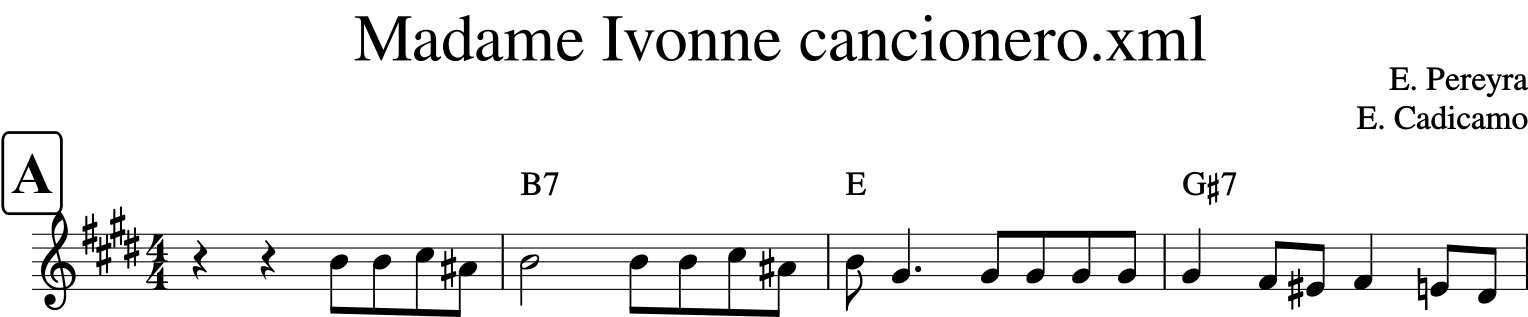

In [6]:
# get the first piece of the dataset (as a dictionary)
piece_dict = dataset[2]

# filename and path for the xml file
filename = piece_dict['path']

# load score from file using music21
piece = m21.converter.parse(filename)

# get the first four measures of the piece
excerpt = piece.measures(0, 4)

# show the score
excerpt.show()

In [7]:
# all the encoded measures of the piece
measures = piece_dict['measures']

# get the first four measures of the piece
excerpt_encoded = measures[0:4]

# show the encoded measures
for m in excerpt_encoded:
    print(m)

[0 0 0 0 1 1 1 1]
[1 0 0 0 1 1 1 1]
[1 1 0 0 1 1 1 1]
[1 0 1 1 1 0 1 1]


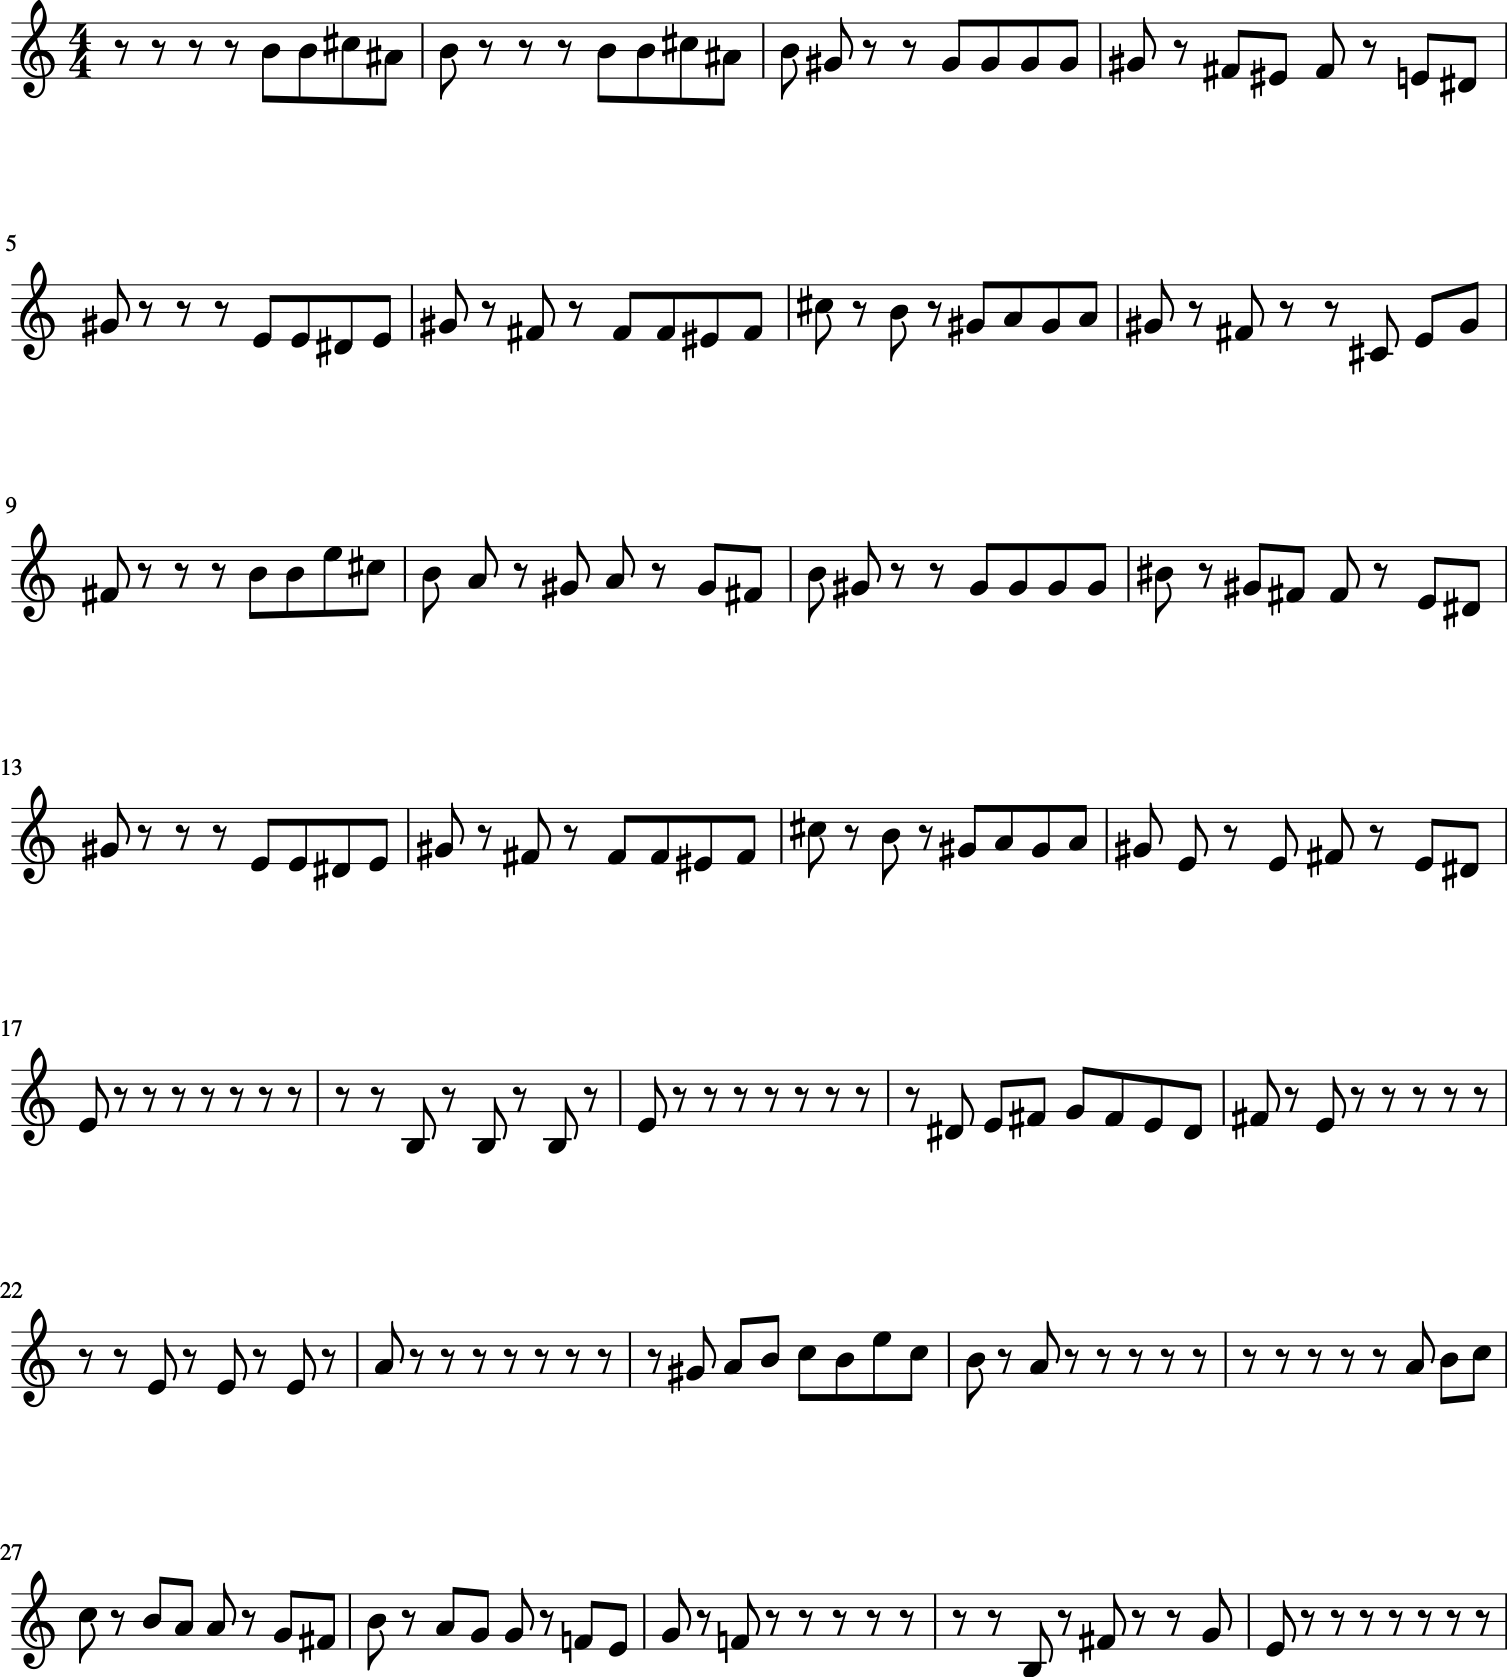

In [8]:
s = m21.stream.Stream()
ts = m21.meter.TimeSignature('4/4')
s.insert(0, ts)

note = m21.note.Note("C4")
note.duration.quarterLength = 0.5
sil = m21.note.Rest()
sil.duration.quarterLength = 0.5

part = piece.parts[0]
#part = excerpt 
for m in part.getElementsByClass('Measure'):
    m_new = m21.stream.Measure()
#    m_new.timeSignature = ts
#    m_new.insert(0, ts)
    for n in m.notesAndRests:
        if not n.isChord:
            dur = n.duration
            divs = dur.quarterLength / 0.5
            post = n.splitByQuarterLengths(int(divs) * [0.5], addTies=False)
            for ind, note in enumerate(post):
                if ind == 0:
                    #if post[0].isNote:
                    #    note.pitch = post[0].pitch
                    #    s.repeatAppend(note, 1)
                    #else:
                    m_new.append(post[0])
                else:
                    m_new.repeatAppend(sil, 1)
    s.append(m_new)
#        for i in range(ts.getBeatDepth(n.offset)):
#            n.addLyric('*')


#note1 = note.Note("C4")
#note1.duration.type = 'half'

#s.append(note1)
s.show()

In [ ]:
part = piece.parts[0]

ts = part.flat.getElementsByClass('TimeSignature')[0]
ts.beatSequence.partition(1)
for h in range(len(ts.beatSequence)):
    ts.beatSequence[h] = ts.beatSequence[h].subdivide(2)
    for i in range(len(ts.beatSequence[h])):
        ts.beatSequence[h][i] = ts.beatSequence[h][i].subdivide(2)
        for j in range(len(ts.beatSequence[h][i])):
            ts.beatSequence[h][i][j] = ts.beatSequence[h][i][j].subdivide(2)

for m in part.getElementsByClass('Measure'):
    for n in m.notesAndRests:
        for i in range(ts.getBeatDepth(n.offset)):
            n.addLyric('*')

part.measures(0, 4).show()

In [ ]:
s = m21.stream.Stream()
ts = m21.meter.TimeSignature('4/4')
s.insert(0, ts)
n = m21.note.Note(type='eighth')
s.repeatAppend(n, 8)
s.makeMeasures(inPlace=True)
post = m21.analysis.metrical.labelBeatDepth(s)
sOut = []

for n in s.flat.notes:
    stars = "".join([l.text for l in n.lyrics])
    sOut.append("{0:8s} {1}".format(n.beatStr, stars))

#print("\n".join(sOut))
post.show()

In [ ]:
#n = m21.note.Note('E')
#n.quarterLength = 3
part = piece.parts[0]

measures = part.getElementsByClass('Measure')
m = measures[1]
nar = m.notesAndRests

n = nar[1]
#for m in part.getElementsByClass('Measure'):
#    for n in m.notesAndRests:
#        for i in range(ts.getBeatDepth(n.offset)):
#            n.addLyric('*')


#post = n.splitByQuarterLengths([1, 1, 1])
#post = n.splitByQuarterLengths([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

#n.show()
#post[0].show()
nar[0].isChord

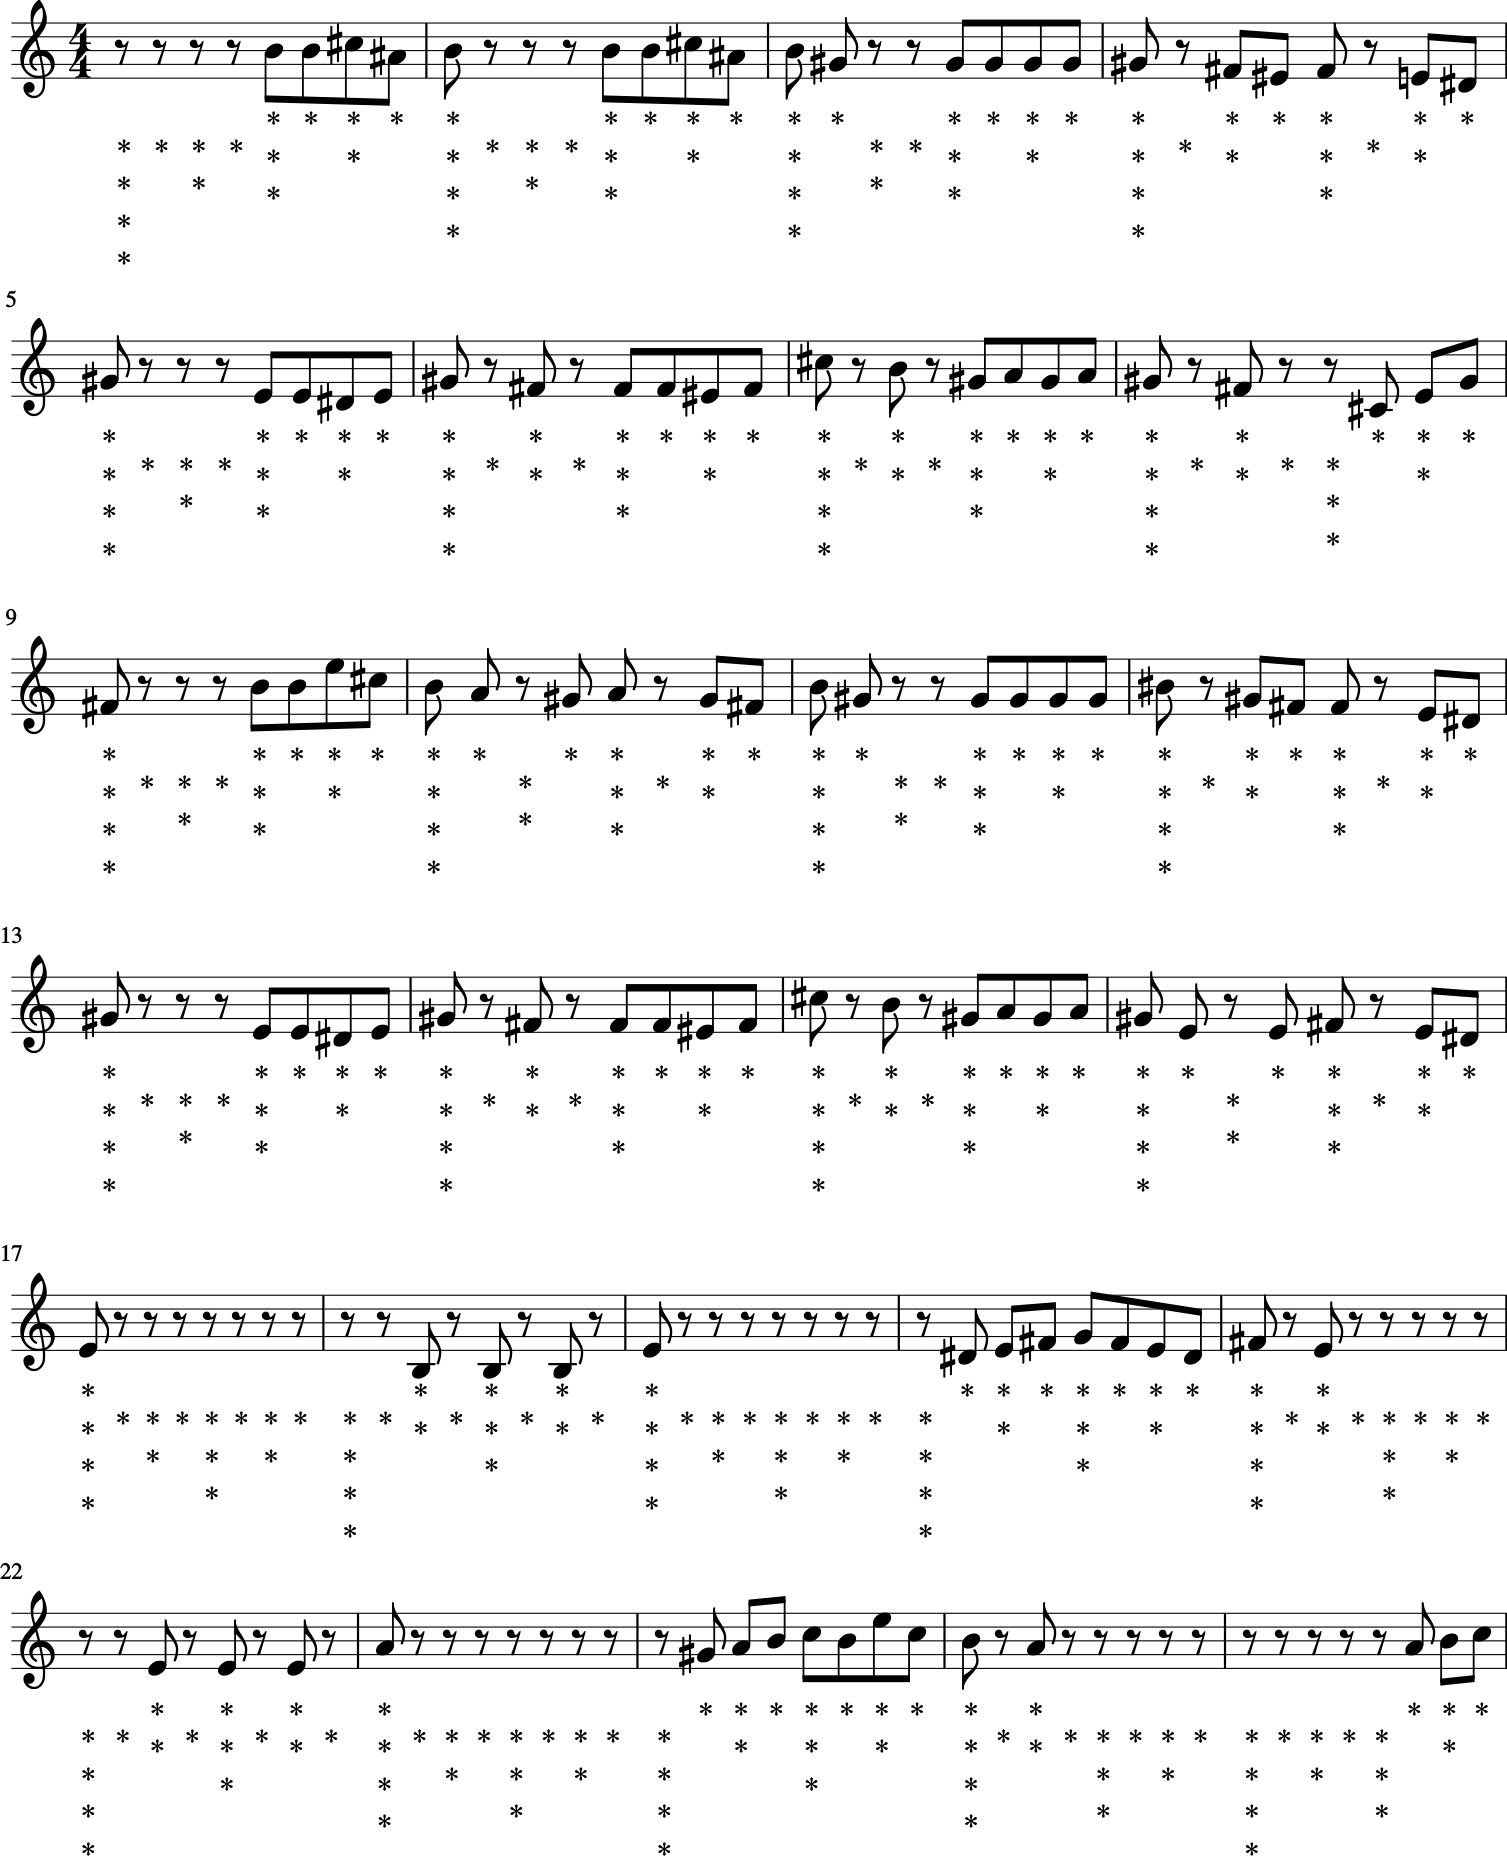

In [9]:
#part = piece.parts[0]
fin = m21.analysis.metrical.labelBeatDepth(s)
fin.show()

## 3. Save the encoded dataset

Save the encoded dataset to a `pickle` file.

In [ ]:
# path to the folder of the encoded dataset
output_folder = '../data/encoded/'

# dataset name
dataset_name = dataset[0]['dataset'] + "_notebook"

# save encoded dataset to pickle file
mf.dataio.save_encoded_dataset(dataset, output_folder + dataset_name + 
                               "_" + signature.replace('/', '') +
                               "_" + str(beat_subdivisions) + ".pkl")

## 4. Load an encoded dataset

Load encoded dataset from a `pickle` file.

In [ ]:
# folder containing the data, i.e. the pickle files
data_folder = '../data/encoded/'
# dataset string
dataset_string = 'tango_songbook' + '_notebook'

# strings for the signature and beat_subdivision
signature_subdivisions = signature.replace('/', '') + "_" + str(beat_subdivisions)

# dataset filename
dataset_filename = dataset_string + "_" + signature_subdivisions + ".pkl"

# load encoded the dataset
dataset = mf.dataio.load_encoded_dataset(data_folder + dataset_filename)

## 5. Encode a dataset from music21

Load and encode a symbolic music dataset from a corpus provided by music21. 

**Note:** the `dataset_string` in this case is the name of the dataset as defined in music21 (e.g. 'airdsAirs', 'oneills1850', 'EssenFolksong').

In [ ]:
# name of the dataset as defined in music21 (e.g. 'airdsAirs', 'oneills1850', 'EssenFolksong').
dataset_string = 'airdsAirs'

# signature
signature = '4/4'

# subdivisions of each beat
beat_subdivisions = 2

# encode the dataset
dataset = mf.dataio.encode_dataset(dataset_string,
                                   signature=signature,
                                   beat_subdivisions=beat_subdivisions)

## 6. Show the results of the encoding for a music21 dataset

### Show some information about the encoded dataset.

In [ ]:
print('-'*80)
print('Corpus name (from directory name): ', dataset[0]['dataset'])
print('Time signature: ', signature)
print('Beat subdivisions: ', beat_subdivisions)
print('Number of encoded pieces: ', len(dataset))
print('-'*80)

### Show some information for the first elements of the dataset.


In [ ]:
# number of elements to show
N = min(10, len(dataset))

for ind in range(N):
    print('Index: ' +  str(dataset[ind]["ind_piece"]) +
          ' Number of measures: '  + str(len(dataset[ind]["measures"])) +
          ' Title: ' + dataset[ind]["title"])

### Show music encoding
Select a piece from the dataset and show score and encoding.

In [ ]:
# get the first piece of the dataset (as a dictionary)
piece_dict = dataset[0]

# filename and path for the xml file
filename = piece_dict['path']

# load music21 opus
opus = m21.converter.parse(filename)
# load score from opus
piece = opus[piece_dict['ind_score']]

# show the whole score
piece.parts[0].show()

In [ ]:
# all the encoded measures of the piece
measures = piece_dict['measures']

# show the encoded measures
for m in measures:
    print(m)